In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from datetime import datetime

In [2]:
ds = pd.read_csv('./ad_org_train.csv')

# Functions 

In [3]:
# Converting Category values to Numbers

def convert_category_to_num(cs):
    if cs == 'A':
        return 0
    elif cs == 'B':
        return 1
    elif cs == 'C':
        return 2
    elif cs == 'D':
        return 3
    elif cs == 'E':
        return 4
    
    elif cs == 'F':
        return 5
    elif cs == 'G':
        return 6
    elif cs == 'H':
        return 7
    else:
        return cs
    
# Converting Duration in seconds
    
def convert_time_to_sec(t):
    if t[-1] != 'S':
        t = t +'S'
    t = t.replace('PT', '')
    t = t.replace('S', '+ 0')
    t = t.replace('H', '*60 + ')
    t = t.replace('M', '*60+ ')
    return eval(t)**(1/8)

# Replacing all 'F' values to Zero

def convert_str_to_num(t):
    if t=='F':
        return np.nan
    else:    
        return eval(t)**(1/8)

# Converting Published date to the number of days till today

def convert_published_to_days(d):
    part = d.split('-')
    date_str = datetime.strptime('%s %s %s' % (part[0], part[1], part[2]), '%Y %m %d').strftime('%Y%m%d')
    d = datetime.strptime(date_str, "%Y%m%d").date()
    d = datetime.now().date() - d
    return d.days**(1/8)

# Replacing negative Predictions to Zero

def no_negatives(x):
    if x<0:
        return 0
    elif x>5429665:
        return 5429665
    else:
        return x

In [4]:
# processing train data
train = ds.drop('vidid', axis=1)
train['duration'] = train['duration'].map(convert_time_to_sec)
train['views'] = train['views'].map(convert_str_to_num)
train['likes'] = train['likes'].map(convert_str_to_num)
train['dislikes'] = train['dislikes'].map(convert_str_to_num)
train['comment'] = train['comment'].map(convert_str_to_num)
train['category'] = train['category'].map(convert_category_to_num)
train['published'] = train['published'].map(convert_published_to_days)
train = train.fillna(train.mean())

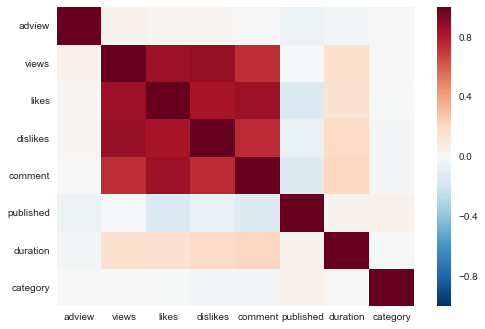

In [5]:
plt.figure(0)
sns.heatmap(train.corr())

In [6]:
# Dividing training data into inputs and outputs
input_cols = ['views', 'likes', 'dislikes', 'comment', 'duration', 'category', 'published']
output_cols = ['adview']
x_train = train[input_cols]
y_train = train[output_cols]

In [7]:
#linear Regression Model
lr = LinearRegression(normalize=True)
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [8]:
# processing test file
test = pd.read_csv('./ad_org_test.csv')
test['duration'] = test['duration'].map(convert_time_to_sec)
test['views'] = test['views'].map(convert_str_to_num)
test['likes'] = test['likes'].map(convert_str_to_num)
test['dislikes'] = test['dislikes'].map(convert_str_to_num)
test['comment'] = test['comment'].map(convert_str_to_num)
test['category'] = test['category'].map(convert_category_to_num)
test['published'] = test['published'].map(convert_published_to_days)
test = test.fillna(test.mean())

In [9]:
# getting predictions
result =lr.predict(test[input_cols])

In [10]:
# converting results in Integers
result = np.asarray(result, dtype='int32')
# Replacing negative Predictions to Zero
for i in range(result.shape[0]):
    result[i] = no_negatives(int(result[i]))

In [11]:
# preparing test_result.csv
answer = test
answer = answer.drop(input_cols, axis=1)
answer['ad_view'] = result
answer = answer.to_csv('test_result.csv', index=False, encoding='utf-8')